In [6]:
import cv2
import matplotlib.pyplot as plt 

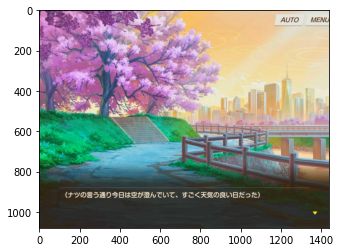

In [57]:
img = cv2.imread("123.jpg")
plt.imshow(img)

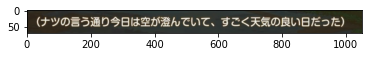

In [68]:
dstimg = img[880:950,100:1150].copy()
plt.imshow(dstimg)

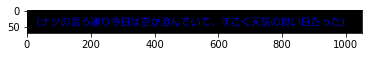

In [62]:
for row in dstimg:
    for col in row:
        if col[2] > 190:
            col[0] = 0
            col[1] = 0
        else:
            col[0] = 0
            col[1] = 0
            col[2] = 0
plt.imshow(dstimg)

In [64]:
srcImg = img[880:950,100:1150].copy()
maskImg = dstimg
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
maskImg = cv2.dilate(maskImg, kernel) #膨胀
gray = cv2.cvtColor(maskImg, cv2.COLOR_BGR2GRAY,1)
inpaintImg = cv2.inpaint(srcImg,gray,3,cv2.INPAINT_NS)

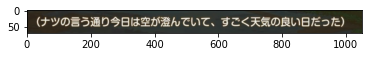

In [70]:
plt.imshow(img[880:950,100:1150])

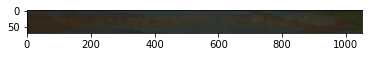

In [71]:
plt.imshow(inpaintImg)

In [179]:
def Inpainting(srcImg,x,y,w,h,type=0):
    src = srcImg[x:x+w,y:y+h].copy()
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY,1)
    if type == 0: #白字
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    elif type == 1:
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
    maskImg = cv2.dilate(thresh, kernel)
    inpaintImg = cv2.inpaint(src,maskImg,3,cv2.INPAINT_NS)
    srcImg[x:x+w,y:y+h] = inpaintImg
    show(srcImg)

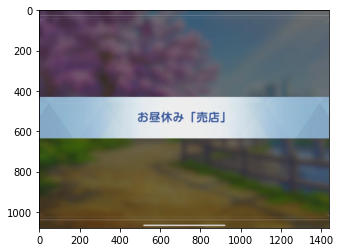

In [87]:
title = cv2.imread("title.jpg")
t = cv2.cvtColor(title,cv2.COLOR_BGR2RGB)
plt.imshow(t)

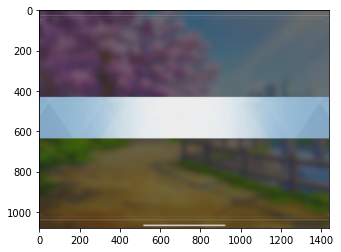

In [180]:
Inpainting(title,480,460,100,490,1)

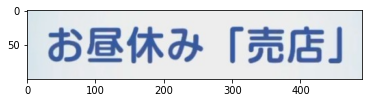

In [123]:
src = title[480:580,460:950]
t = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
plt.imshow(t)

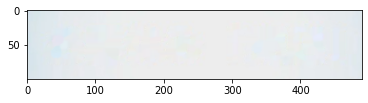

In [124]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY,1)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
maskImg = cv2.dilate(thresh, kernel) #膨胀
inpaintImg = cv2.inpaint(src,maskImg,3,cv2.INPAINT_NS)

t = cv2.cvtColor(inpaintImg,cv2.COLOR_BGR2RGB)
plt.imshow(t)

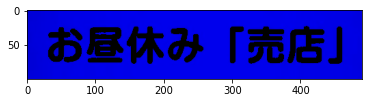

In [125]:
dst = src.copy()
for row in dst:
    for col in row:
        if col[2] > 190:
            col[0] = col[1] = 0
        else:
            col[0] = col[1] = col[2] = 0

#dst = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
plt.imshow(dst)

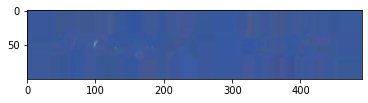

In [126]:
maskImg = dst
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
maskImg = cv2.dilate(maskImg, kernel) #膨胀
gray = cv2.cvtColor(maskImg, cv2.COLOR_BGR2GRAY,1)
inpaintImg = cv2.inpaint(src,gray,3,cv2.INPAINT_NS)
inpaintImg = cv2.cvtColor(inpaintImg,cv2.COLOR_BGR2RGB)
plt.imshow(inpaintImg)

In [129]:
def show(src):
    t = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
    plt.imshow(t)

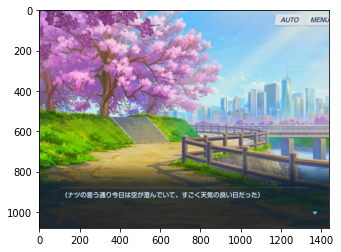

In [130]:
img = cv2.imread("dialogue.jpg")
show(img)

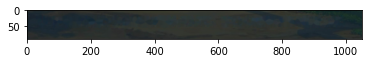

In [167]:
Inpainting(img,880,100,90,1050,0)

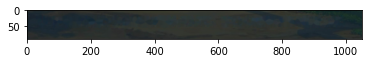

In [170]:
gray = cv2.cvtColor(img[880:970,100:1150], cv2.COLOR_BGR2GRAY,1)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
maskImg = cv2.dilate(thresh, kernel) #膨胀
inpaintImg = cv2.inpaint(img[880:970,100:1150],maskImg,3,cv2.INPAINT_NS)

show(inpaintImg)

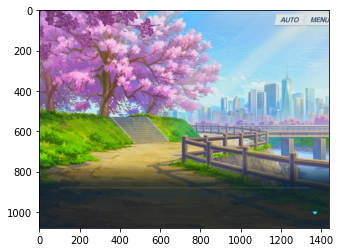

In [171]:
img[880:970,100:1150] = inpaintImg
show(img)